In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [57]:
import re

stop_words = ["a",
"actualmente",
"adelante",
"además",
"afirmó",
"agregó",
"ahora",
"ahí",
"al",
"algo",
"alguna",
"algunas",
"alguno",
"algunos",
"algún",
"alrededor",
"ambos",
"ampleamos",
"ante",
"anterior",
"antes",
"apenas",
"aproximadamente",
"aquel",
"aquellas",
"aquellos",
"aqui",
"aquí",
"arriba",
"aseguró",
"así",
"atras",
"aunque",
"ayer",
"añadió",
"aún",
"bajo",
"bastante",
"bien",
"buen",
"buena",
"buenas",
"bueno",
"buenos",
"cada",
"casi",
"cerca",
"cierta",
"ciertas",
"cierto",
"ciertos",
"cinco",
"comentó",
"como",
"con",
"conocer",
"conseguimos",
"conseguir",
"considera",
"consideró",
"consigo",
"consigue",
"consiguen",
"consigues",
"contra",
"cosas",
"creo",
"cual",
"cuales",
"cualquier",
"cuando",
"cuanto",
"cuatro",
"cuenta",
"cómo",
"da",
"dado",
"dan",
"dar",
"de",
"debe",
"deben",
"debido",
"decir",
"dejó",
"del",
"demás",
"dentro",
"desde",
"después",
"dice",
"dicen",
"dicho",
"dieron",
"diferente",
"diferentes",
"dijeron",
"dijo",
"dio",
"donde",
"dos",
"durante",
"e",
"ejemplo",
"el",
"ella",
"ellas",
"ello",
"ellos",
"embargo",
"empleais",
"emplean",
"emplear",
"empleas",
"empleo",
"en",
"encima",
"encuentra",
"entonces",
"entre",
"era",
"erais",
"eramos",
"eran",
"eras",
"eres",
"es",
"esa",
"esas",
"ese",
"eso",
"esos",
"esta",
"estaba",
"estabais",
"estaban",
"estabas",
"estad",
"estada",
"estadas",
"estado",
"estados",
"estais",
"estamos",
"estan",
"estando",
"estar",
"estaremos",
"estará",
"estarán",
"estarás",
"estaré",
"estaréis",
"estaría",
"estaríais",
"estaríamos",
"estarían",
"estarías",
"estas",
"este",
"estemos",
"esto",
"estos",
"estoy",
"estuve",
"estuviera",
"estuvierais",
"estuvieran",
"estuvieras",
"estuvieron",
"estuviese",
"estuvieseis",
"estuviesen",
"estuvieses",
"estuvimos",
"estuviste",
"estuvisteis",
"estuviéramos",
"estuviésemos",
"estuvo",
"está",
"estábamos",
"estáis",
"están",
"estás",
"esté",
"estéis",
"estén",
"estés",
"ex",
"existe",
"existen",
"explicó",
"expresó",
"fin",
"fue",
"fuera",
"fuerais",
"fueran",
"fueras",
"fueron",
"fuese",
"fueseis",
"fuesen",
"fueses",
"fui",
"fuimos",
"fuiste",
"fuisteis",
"fuéramos",
"fuésemos",
"gran",
"grandes",
"gueno",
"ha",
"haber",
"habida",
"habidas",
"habido",
"habidos",
"habiendo",
"habremos",
"habrá",
"habrán",
"habrás",
"habré",
"habréis",
"habría",
"habríais",
"habríamos",
"habrían",
"habrías",
"habéis",
"había",
"habíais",
"habíamos",
"habían",
"habías",
"hace",
"haceis",
"hacemos",
"hacen",
"hacer",
"hacerlo",
"haces",
"hacia",
"haciendo",
"hago",
"han",
"has",
"hasta",
"hay",
"haya",
"hayamos",
"hayan",
"hayas",
"hayáis",
"he",
"hecho",
"hemos",
"hicieron",
"hizo",
"hoy",
"hube",
"hubiera",
"hubierais",
"hubieran",
"hubieras",
"hubieron",
"hubiese",
"hubieseis",
"hubiesen",
"hubieses",
"hubimos",
"hubiste",
"hubisteis",
"hubiéramos",
"hubiésemos",
"hubo",
"igual",
"incluso",
"indicó",
"informó",
"intenta",
"intentais",
"intentamos",
"intentan",
"intentar",
"intentas",
"intento",
"ir",
"junto",
"la",
"lado",
"largo",
"las",
"le",
"les",
"llegó",
"lleva",
"llevar",
"lo",
"los",
"luego",
"lugar",
"manera",
"manifestó",
"mayor",
"me",
"mediante",
"mejor",
"mencionó",
"menos",
"mi",
"mientras",
"mio",
"mis",
"misma",
"mismas",
"mismo",
"mismos",
"modo",
"momento",
"mucha",
"muchas",
"mucho",
"muchos",
"muy",
"más",
"mí",
"mía",
"mías",
"mío",
"míos",
"nada",
"nadie",
"ni",
"ninguna",
"ningunas",
"ninguno",
"ningunos",
"ningún",
"no",
"nos",
"nosotras",
"nosotros",
"nuestra",
"nuestras",
"nuestro",
"nuestros",
"nueva",
"nuevas",
"nuevo",
"nuevos",
"nunca",
"o",
"ocho",
"os",
"otra",
"otras",
"otro",
"otros",
"para",
"parece",
"parte",
"partir",
"pasada",
"pasado",
"pero",
"pesar",
"poca",
"pocas",
"poco",
"pocos",
"podeis",
"podemos",
"poder",
"podria",
"podriais",
"podriamos",
"podrian",
"podrias",
"podrá",
"podrán",
"podría",
"podrían",
"poner",
"por",
"por qué",
"porque",
"posible",
"primer",
"primera",
"primero",
"primeros",
"principalmente",
"propia",
"propias",
"propio",
"propios",
"próximo",
"próximos",
"pudo",
"pueda",
"puede",
"pueden",
"puedo",
"pues",
"que",
"quedó",
"queremos",
"quien",
"quienes",
"quiere",
"quién",
"qué",
"realizado",
"realizar",
"realizó",
"respecto",
"sabe",
"sabeis",
"sabemos",
"saben",
"saber",
"sabes",
"se",
"sea",
"seamos",
"sean",
"seas",
"segunda",
"segundo",
"según",
"seis",
"ser",
"seremos",
"será",
"serán",
"serás",
"seré",
"seréis",
"sería",
"seríais",
"seríamos",
"serían",
"serías",
"seáis",
"señaló",
"si",
"sido",
"siempre",
"siendo",
"siete",
"sigue",
"siguiente",
"sin",
"sino",
"sobre",
"sois",
"sola",
"solamente",
"solas",
"solo",
"solos",
"somos",
"son",
"soy",
"su",
"sus",
"suya",
"suyas",
"suyo",
"suyos",
"sí",
"sólo",
"tal",
"también",
"tampoco",
"tan",
"tanto",
"te",
"tendremos",
"tendrá",
"tendrán",
"tendrás",
"tendré",
"tendréis",
"tendría",
"tendríais",
"tendríamos",
"tendrían",
"tendrías",
"tened",
"teneis",
"tenemos",
"tener",
"tenga",
"tengamos",
"tengan",
"tengas",
"tengo",
"tengáis",
"tenida",
"tenidas",
"tenido",
"tenidos",
"teniendo",
"tenéis",
"tenía",
"teníais",
"teníamos",
"tenían",
"tenías",
"tercera",
"ti",
"tiempo",
"tiene",
"tienen",
"tienes",
"toda",
"todas",
"todavía",
"todo",
"todos",
"total",
"trabaja",
"trabajais",
"trabajamos",
"trabajan",
"trabajar",
"trabajas",
"trabajo",
"tras",
"trata",
"través",
"tres",
"tu",
"tus",
"tuve",
"tuviera",
"tuvierais",
"tuvieran",
"tuvieras",
"tuvieron",
"tuviese",
"tuvieseis",
"tuviesen",
"tuvieses",
"tuvimos",
"tuviste",
"tuvisteis",
"tuviéramos",
"tuviésemos",
"tuvo",
"tuya",
"tuyas",
"tuyo",
"tuyos",
"tú",
"ultimo",
"un",
"una",
"unas",
"uno",
"unos",
"usa",
"usais",
"usamos",
"usan",
"usar",
"usas",
"uso",
"usted",
"va",
"vais",
"valor",
"vamos",
"van",
"varias",
"varios",
"vaya",
"veces",
"ver",
"verdad",
"verdadera",
"verdadero",
"vez",
"vosotras",
"vosotros",
"voy",
"vuestra",
"vuestras",
"vuestro",
"vuestros",
"y",
"ya",
"yo",
"él",
"éramos",
"ésta",
"éstas",
"éste",
"éstos",
"última",
"últimas",
"último",
"últimos",
"amilcarmontejo"
]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [69]:
df = pd.read_csv('traficogt.csv')
# Limpiando datos
df = df.drop(df.columns[0], axis=1)	# Primera columna no es necesaria
df = df.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
df = df.drop(['id'], axis=1)
df = df.drop(['id_str'], axis=1)
df = df.drop(['url'], axis=1)

from string import punctuation
# Eliminar signos de puntuacion
df['rawContent'] = df['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))
# Eliminar @
df['rawContent'] = df['rawContent'].str.replace('@', '')
df['rawContent'] = df['rawContent'].str.replace('#', '')
# Eliminar emoji
df['rawContent'] = df['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df['rawContent'] = df['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# Manejar zona
df['rawContent'] = df['rawContent'].str.replace('zona ', 'zona')
# Elimar traficogt
df['rawContent'] = df['rawContent'].str.replace('traficogt', '')
df['rawContent'] = df['rawContent'].str.replace('transitogt', '')
df['rawContent'] = df['rawContent'].str.replace('tránsitogt', '')
df['rawContent'] = df['rawContent'].str.replace('tráficogt', '')
spanish_df = df[df['lang'] == 'es']
spanish_df.head()

,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,hashtags,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,amílcar montejo director comunicación emetra c...,1,2,8,0,1701654244858679742,"['ahora', 'tráficogt']",...,"{'id': 1701651855212691764, 'id_str': '1701651...",nan,nan,nan,nan,"<a href=""https://twitter.com"" rel=""nofollow"">t...",https://twitter.com,tweetdeck web app,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet
1,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,conductora negó movilizar vehículo multada cal...,149,78,524,49,1701651855212691764,[],...,nan,nan,nan,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,twitter for iphone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet
2,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,camión arena volteado viaducto pulté hacienda ...,2,1,4,0,1701348453916311903,"['transitogt', 'traficogt']",...,nan,nan,nan,nan,nan,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet
3,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,paciente 39 años dolor lumbar 1 año caída 45 s...,3,17,95,0,1701995859229958189,[],...,nan,nan,nan,nan,nan,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet
4,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,amílcar montejo director comunicación emetra i...,0,0,20,0,1701216420997017888,"['ahora', 'tráficogt']",...,nan,nan,nan,nan,nan,"<a href=""https://twitter.com"" rel=""nofollow"">t...",https://twitter.com,tweetdeck web app,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet


# Análisis exploratorio

## Tabla de frecuencia por palabra español

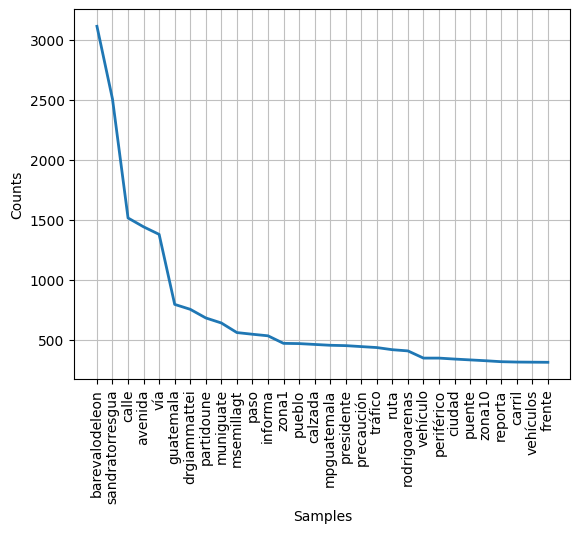

<Axes: xlabel='Samples', ylabel='Counts'>

In [71]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
tweet_words = [w for sentence in spanish_df['rawContent'] for w in sentence.split()]
nlp_words=nltk.FreqDist(tweet_words)
nlp_words.plot(30)

## Analizando en la época de lluvia

/Users/guillermosantosbarrios/Developer/Universidad/2023/Data Science/datascience_laboratorio6/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


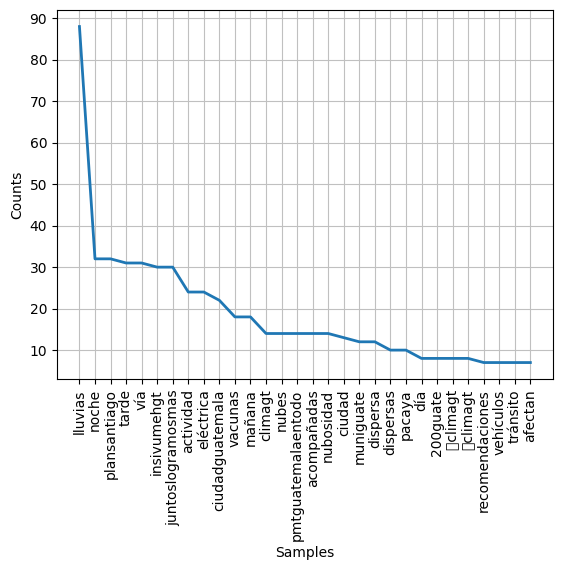

<Axes: xlabel='Samples', ylabel='Counts'>

In [72]:
tweets_with_lluvia = spanish_df[spanish_df['rawContent'].str.contains('lluvias', case=False)]
tweet_words = [w for sentence in tweets_with_lluvia['rawContent'] for w in sentence.split()]
nlp_words=nltk.FreqDist(tweet_words)
nlp_words.plot(30)


In [67]:
# Count the number of tweets in tweets_with_lluvia that have the word 'accidente'

51       recuerda recomendaciones  lluvias alerta indic...
99        ⚠️ autoridades tránsito informan lluvias afec...
1002     fiscalnvicto cidh pactodecorruptos sandratorre...
2475     recuerda recomendaciones  lluvias alerta indic...
2529      ⚠️ autoridades tránsito informan lluvias afec...
                               ...                        
12405    árbol cayó carril auxiliar avenida reforma zon...
12407     tome precauciones riesgo humedad lluvias sema...
12416    efegaso gramajojavier  vergüenza 3 horas  subi...
12424    colisiones afectan movilidad heridos trasladad...
12458    puente lluvias gracia carro averiado afecta  n...
Name: rawContent, Length: 78, dtype: object


## Analizando tweets que contienen Zona5

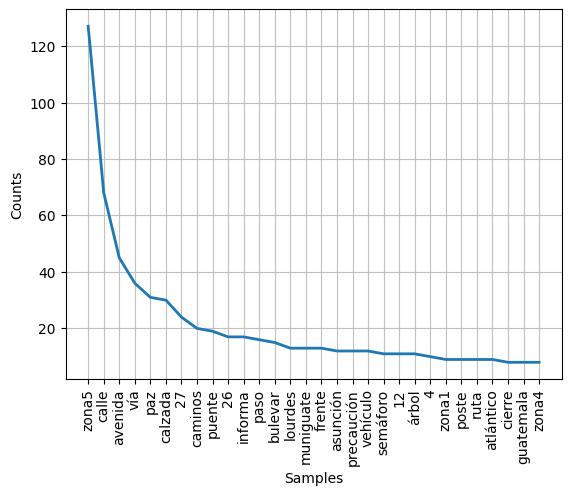

<Axes: xlabel='Samples', ylabel='Counts'>

In [75]:
tweets_z5 = spanish_df[spanish_df['rawContent'].str.contains('zona5', case=False)]
tweet_words = [w for sentence in tweets_z5['rawContent'] for w in sentence.split()]
nlp_words=nltk.FreqDist(tweet_words)
nlp_words.plot(30)

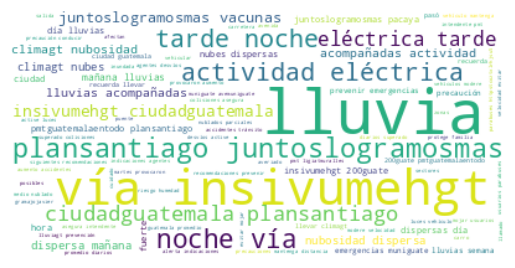

In [74]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(word for word in tweets_with_lluvia['rawContent'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()